# Goal: crop satellite image to area of europe.

In [1]:
import satpy
import numpy as np
from pyresample.geometry import AreaDefinition, create_area_def
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
filenames = ['../data/satellite/MSG3-SEVI-MSG15-0100-NA-20230421131242.122000000Z-NA.nat']

In [84]:
from satpy import Scene
scn = Scene(reader="seviri_l1b_native", filenames=filenames)
scn.load([
 'IR_016',
 'IR_039',
 'IR_087',
 'IR_097',
 'IR_108',
 'IR_120',
 'IR_134',
 'VIS006',
 'VIS008',
 'WV_062',
 'WV_073'], upper_right_corner="NE")

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/satpy/readers/seviri_base.py:386: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset.coords['acq_time'] = ('y', acq_time)
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/satpy/readers/seviri_base.py:386: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64

In [85]:
area_extent=[0, 5000, 300000, 305000]

In [86]:
proj_string = scn['IR_120'].attrs['area'].proj4_string

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [87]:
scn['IR_120'].attrs['area']

Area ID: msg_seviri_fes_3km
Description: MSG SEVIRI Full Earth Scanning service area definition with 3 km resolution
Projection: {'a': '6378169', 'h': '35785831', 'lon_0': '0', 'no_defs': 'None', 'proj': 'geos', 'rf': '295.488065897014', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 3712
Number of rows: 3712
Area extent: (-5570248.4773, -5567248.0742, 5567248.0742, 5570248.4773)

In [88]:
my_dict = {'a': '6378169', 'h': '35785831', 'lon_0': '50', 'no_defs': 'None', 'proj': 'merc', 'rf': '295.488065897014', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}

In [89]:
area_def = AreaDefinition.from_extent("west_europe", area_extent=[5567248.0742, 5570248.4773, -5570248.4773, -5567248.0742], shape=(3000, 3000), projection=proj_string, units="m")

In [90]:
pp = '+proj=geos +h=35785831 +lat_0=52.5 +lon_0=5.5 +ellps=WGS84'

In [141]:
mi_area = create_area_def('my_area', projection=pp,
                              width=300, height=300,
                              area_extent=[-1, 50, 5, 55], units="deg")

In [142]:
7 + 11

18

In [143]:
58-40

18

In [144]:
result = scn.crop(mi_area)

In [145]:
result['IR_016'].values.shape

(90, 152)

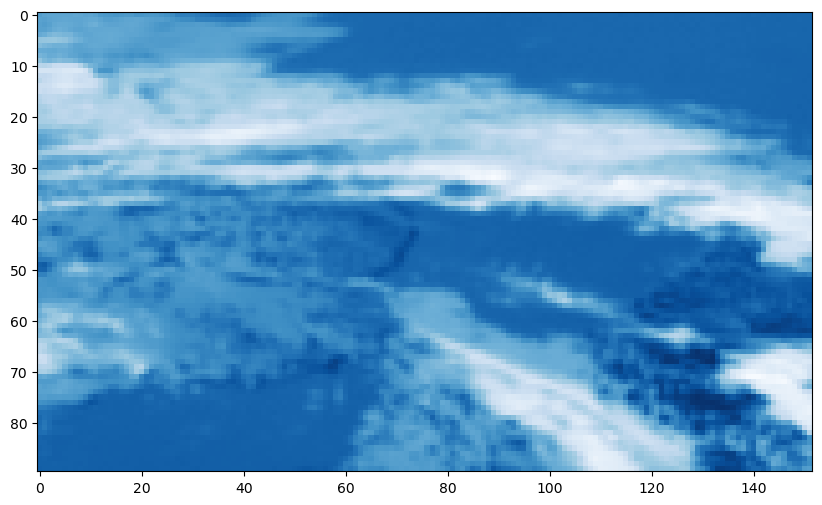

In [146]:
plt.figure(figsize=(10, 10))
plt.imshow(result['IR_120'].values, cmap="Blues")

In [81]:
mi_area_dos = create_area_def('my_area', projection=pp,
                              width=300, height=300,
                              area_extent=[0, 50, 10, 55], units="deg")

(90, 228)


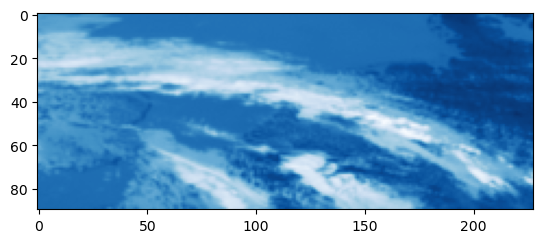

In [83]:
test = scn.crop(mi_area_dos)
print(test['IR_016'].values.shape)
plt.imshow(np.flipud(np.fliplr(test['IR_120'])), cmap='Blues')

In [153]:
np.max(test["VIS008"].values)

74.44658

In [169]:
channels = [
 'IR_016',
 'IR_039',
 'IR_087',
 'IR_097',
 'IR_108',
 'IR_120',
 'IR_134',
 'VIS006',
 'VIS008',
 'WV_062',
 'WV_073']
my_test = np.array([test[c].values for c in channels])

In [171]:
np.max(my_test)

300.85568

In [174]:
my_test.shape

(11, 90, 228)

In [199]:
maxes = np.amax(my_test, axis=(1, 2))
mins = np.amin(my_test, axis=(1, 2))
std = np.std(my_test, axis=(1, 2))

In [200]:
maxes

array([ 58.87277 , 300.85568 , 290.54672 , 251.1083  , 294.59036 ,
       293.39365 , 261.73776 ,  64.718056,  74.44658 , 242.27457 ,
       254.93658 ], dtype=float32)

In [201]:
mins

array([  0.       , 248.3995   , 227.43254  , 227.10966  , 226.74144  ,
       226.31686  , 224.65143  ,   4.3356867,   2.1163743, 222.7598   ,
       224.66728  ], dtype=float32)

In [202]:
std

array([13.962018 , 11.037936 , 13.035557 ,  4.9417467, 13.959066 ,
       13.784536 ,  7.2795444, 14.087657 , 16.75637  ,  2.8728092,
        5.0582075], dtype=float32)

In [204]:
dummy_image = np.ones((11, 64, 64))

In [205]:
dummy_image[0][0][0]

1.0

In [207]:
channels_first = dummy_image.reshape((64, 64, 11))

In [209]:
mins

array([  0.       , 248.3995   , 227.43254  , 227.10966  , 226.74144  ,
       226.31686  , 224.65143  ,   4.3356867,   2.1163743, 222.7598   ,
       224.66728  ], dtype=float32)

In [217]:
intermediate = channels_first - mins

In [218]:
result = intermediate.reshape(11, 64, 64)

In [221]:
result[3]

array([[-247.39950562, -226.43254089, -226.10966492, ...,   -3.33568668,
          -1.11637425, -221.75979614],
       [-223.6672821 ,    1.        , -247.39950562, ..., -225.31686401,
        -223.65142822,   -3.33568668],
       [  -1.11637425, -221.75979614, -223.6672821 , ..., -226.10966492,
        -225.74143982, -225.31686401],
       ...,
       [   1.        , -247.39950562, -226.43254089, ..., -223.65142822,
          -3.33568668,   -1.11637425],
       [-221.75979614, -223.6672821 ,    1.        , ..., -225.74143982,
        -225.31686401, -223.65142822],
       [  -3.33568668,   -1.11637425, -221.75979614, ..., -226.43254089,
        -226.10966492, -225.74143982]])

In [216]:
result[5]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [229]:
# Assuming your original array is called 'original_array'
original_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# Repeat each element 64 x 64 times
repeated_array = np.repeat(mins, 64*64)

# Reshape the repeated array to the desired shape
new_array = repeated_array.reshape(11, 64, 64)

# Print the shape of the new array
print(new_array.shape)

(11, 64, 64)


In [231]:
new_array[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [245]:
reshaped = dummy_image.reshape(64, 64, 11)
reshaped = reshaped - original_array
res = reshaped.reshape(11, 64, 64)

In [247]:
res[0]

array([[  0.,  -1.,  -2., ...,  -6.,  -7.,  -8.],
       [ -9., -10.,   0., ...,  -4.,  -5.,  -6.],
       [ -7.,  -8.,  -9., ...,  -2.,  -3.,  -4.],
       ...,
       [-10.,   0.,  -1., ...,  -5.,  -6.,  -7.],
       [ -8.,  -9., -10., ...,  -3.,  -4.,  -5.],
       [ -6.,  -7.,  -8., ...,  -1.,  -2.,  -3.]])

In [225]:
mins

array([  0.       , 248.3995   , 227.43254  , 227.10966  , 226.74144  ,
       226.31686  , 224.65143  ,   4.3356867,   2.1163743, 222.7598   ,
       224.66728  ], dtype=float32)

In [224]:
np.resize(mins, (64, 64))

array([[  0.       , 248.3995   , 227.43254  , ..., 224.65143  ,
          4.3356867,   2.1163743],
       [222.7598   , 224.66728  ,   0.       , ..., 226.74144  ,
        226.31686  , 224.65143  ],
       [  4.3356867,   2.1163743, 222.7598   , ..., 227.43254  ,
        227.10966  , 226.74144  ],
       ...,
       [224.66728  ,   0.       , 248.3995   , ..., 226.31686  ,
        224.65143  ,   4.3356867],
       [  2.1163743, 222.7598   , 224.66728  , ..., 227.10966  ,
        226.74144  , 226.31686  ],
       [224.65143  ,   4.3356867,   2.1163743, ..., 248.3995   ,
        227.43254  , 227.10966  ]], dtype=float32)

In [12]:
crs = result['IR_120'].attrs['area'].to_cartopy_crs()
ax = plt.axes(projection=crs)

ax.coastlines()
ax.gridlines()
ax.set_global()
plt.imshow(result['IR_120'], transform=crs, extent=crs.bounds, origin='upper', cmap="Blues")
cbar = plt.colorbar()
plt.show()

NameError: name 'result' is not defined

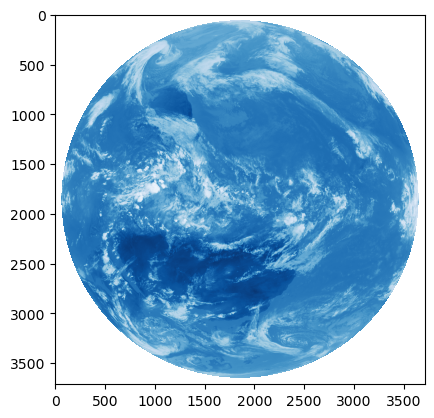

In [13]:
plt.imshow(scn['IR_120'], cmap="Blues")

In [18]:
from pyresample.utils import get_area_def
area_id = 'japan'
x_size = 2407
y_size = 1655
area_extent = [-600000.0, -600000.0, 6969000.0, 5069000.0]
projection = '+proj=merc +lat_0=52.5 +lon_0=5.5 +ellps=WGS84'
description = "Netherlands"
proj_id = 'merc.5_37.5'

areadef = get_area_def(area_id, description, proj_id, projection,x_size, y_size, area_extent)

/var/folders/d_/39m2_j3d7l5859lht1tjp1_h0000gn/T/ipykernel_22583/828913651.py:10: UserWarning: 'get_area_def' has moved, import it with 'from pyresample import get_area_def'
  areadef = get_area_def(area_id, description, proj_id, projection,x_size, y_size, area_extent)
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [19]:
local_scene = scn.resample(areadef)

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/satpy/resample.py:448: UserWarning: Upgrade 'pyresample' for a more accurate default 'radius_of_influence'.
  cache_id = self.precompute(cache_dir=cache_dir, **kwargs)


/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))


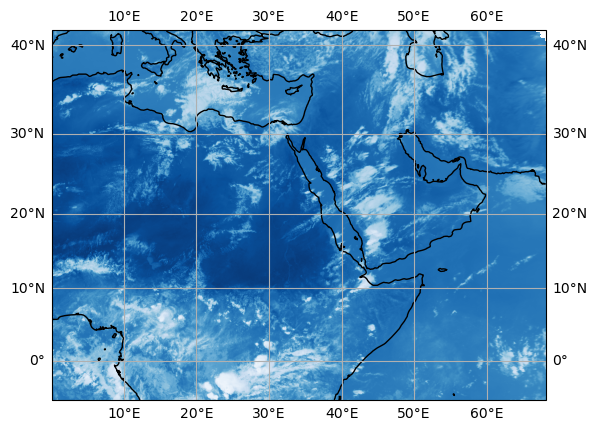

In [20]:
crs = local_scene['IR_120'].attrs['area'].to_cartopy_crs()
ax = plt.axes(projection=crs)

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
plt.imshow(local_scene['IR_120'], transform=crs, extent=crs.bounds, origin='upper', cmap="Blues")
# cbar = plt.colorbar()
plt.show()

In [99]:
custom_area = create_area_def('my_area', projection=projection,
                              width=300, height=300,
                              area_extent=[-7, 40, 11, 58], units='degrees')

In [100]:
custom_scn = scn.resample(custom_area)

In [101]:
custom_scn['IR_120'].values.shape

(300, 300)

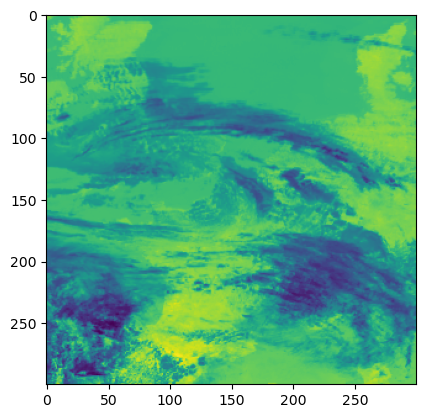

In [102]:
plt.imshow(custom_scn['IR_108'])

In [55]:
copy_of_data = np.array(custom_scn['IR_120'].values)

In [23]:
copy_of_data

array([[274.04913, 274.04913, 274.04913, ..., 276.53433, 276.53433,
        276.53433],
       [274.04913, 274.04913, 274.04913, ..., 276.53433, 276.53433,
        276.53433],
       [274.04913, 274.04913, 274.04913, ..., 276.53433, 276.53433,
        276.53433],
       ...,
       [277.14703, 277.14703, 277.14703, ..., 224.92793, 224.92793,
        224.92793],
       [277.14703, 277.14703, 277.14703, ..., 224.92793, 224.92793,
        224.92793],
       [277.14703, 277.14703, 277.14703, ..., 224.92793, 224.92793,
        224.92793]], dtype=float32)

In [24]:
copy_of_data[copy_of_data > 270] = 0

In [25]:
from matplotlib.colors import Normalize

In [26]:
np.max(copy_of_data)

269.88547

In [27]:
alphas = Normalize(0, 223, clip=True)(copy_of_data)

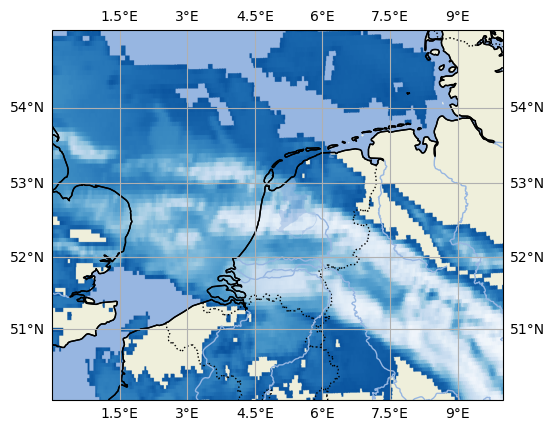

In [28]:
crs = custom_scn['IR_120'].attrs['area'].to_cartopy_crs()
ax = plt.axes(projection=crs)

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
plt.imshow(custom_scn['IR_120'], transform=crs, extent=crs.bounds, origin='upper', alpha=alphas, cmap='Blues')
# cbar = plt.colorbar()
plt.show()

In [259]:
# plt.imshow(custom_scn['IR_120'], alpha=0.4)

In [260]:
from matplotlib.colors import Normalize

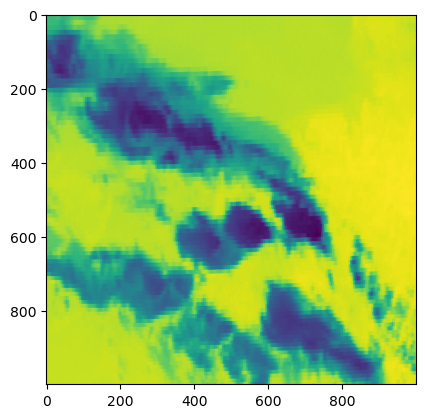

In [270]:
plt.imshow(custom_scn['IR_120'].values)

In [297]:
copy_of_values = custom_scn['IR_120'].values

In [298]:
copy_of_values

array([[262.9613 , 262.9613 , 262.9613 , ..., 278.9655 , 278.9655 ,
        278.9655 ],
       [262.9613 , 262.9613 , 262.9613 , ..., 278.9655 , 278.9655 ,
        278.9655 ],
       [262.9613 , 262.9613 , 262.9613 , ..., 278.9655 , 278.9655 ,
        278.9655 ],
       ...,
       [279.26578, 279.26578, 279.11572, ..., 277.75644, 277.75644,
        277.75644],
       [279.26578, 279.26578, 279.11572, ..., 277.75644, 277.75644,
        277.75644],
       [279.26578, 279.26578, 279.11572, ..., 277.75644, 277.75644,
        277.75644]], dtype=float32)

In [293]:
alphas = Normalize(0, 100, clip=True)(np.abs(custom_scn['IR_120'].values))

In [294]:
alphas

masked_array(
  data=[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [295]:
alphas = np.clip(alphas, 0, 1)

In [296]:
alphas

masked_array(
  data=[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

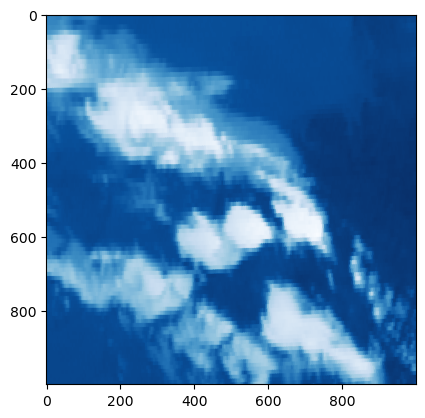

In [289]:
plt.imshow(custom_scn['IR_120'], alpha=alphas, cmap="Blues")